<a href="https://colab.research.google.com/github/kaushalkuma-r/Machine-Learning-Course/blob/main/Incremental%20Learning/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Dataset

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [97]:
data = pd.read_csv('https://raw.githubusercontent.com/kaushalkuma-r/Heart-Disease-Prediction/main/heart.csv')

# Data Visualization

In [98]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [99]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [100]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [101]:
data.shape

(303, 14)

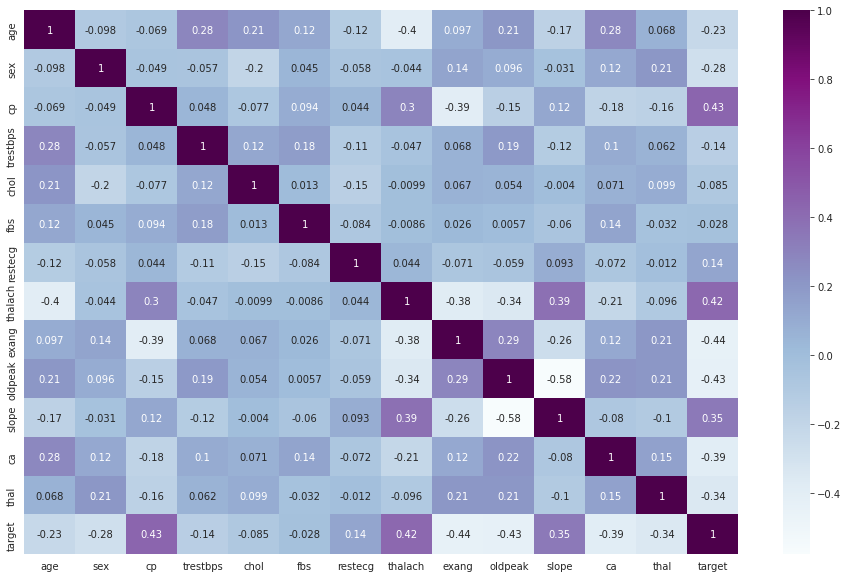

In [102]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot = True,cmap='BuPu')
plt.show()

In [103]:
data['target'].unique()

array([1, 0])

In [104]:
y = data['target']
X = data.drop('target',axis = 1)

In [105]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


# Train1-Train2-Test Splitting

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [107]:
X_train1,X_train2,y_train1,y_train2=train_test_split(X_train,y_train,test_size=0.5,random_state=42)

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train1 = scaler.fit_transform(X_train1)

X_train2 = scaler.transform(X_train2)
X_test=scaler.transform(X_test)

# SVC

## Model - 1(Trained on Train1 Dataset)

In [109]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 


svc.fit(X_train1,y_train1)
y_pred_train1=svc.predict(X_train1)
y_pred=svc.predict(X_test)

In [110]:
print(' Model testing accuracy score for training dataset 1',(accuracy_score(y_test, y_pred)))
print('Model training accuracy score for training dataset 1',(accuracy_score(y_train1, y_pred_train1)))

 Model testing accuracy score for training dataset 1 0.8688524590163934
Model training accuracy score for training dataset 1 0.8677685950413223


## Model - 2 (Trained on Train2 Dataset)

In [111]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_train2=SVC() 


svc_train2.fit(X_train2,y_train2)
y_pred2=svc_train2.predict(X_train2)
y_pred_train2=svc.predict(X_test)

In [112]:
print('Model testing accuracy score with training2 dataset ',(accuracy_score(y_test, y_pred_train2)))
print('Model training accuracy score with training2 dataset ',(accuracy_score(y_train2, y_pred2)))

Model testing accuracy score with training2 dataset  0.8688524590163934
Model training accuracy score with training2 dataset  0.9090909090909091


## Model - 3 (Trained on weights of Model - 1 with Train2 Dataset)

In [113]:
model_A_support_vectors=svc.support_vectors_

In [114]:
model_A_support_vectors

array([[0.60465116, 1.        , 0.66666667, 0.53488372, 0.04050633,
        0.        , 0.        , 0.60606061, 0.        , 0.53571429,
        0.5       , 0.        , 0.66666667],
       [0.72093023, 1.        , 1.        , 0.51162791, 0.28607595,
        1.        , 0.        , 0.7979798 , 0.        , 0.25      ,
        0.5       , 0.25      , 0.66666667],
       [0.65116279, 0.        , 0.        , 0.65116279, 0.18987342,
        0.        , 0.5       , 0.5959596 , 1.        , 0.25      ,
        0.5       , 0.        , 0.66666667],
       [0.39534884, 1.        , 0.        , 0.53488372, 0.32911392,
        0.        , 0.5       , 0.78787879, 1.        , 0.28571429,
        1.        , 0.        , 1.        ],
       [0.60465116, 1.        , 0.        , 0.26744186, 0.15443038,
        1.        , 0.5       , 0.65656566, 1.        , 0.25      ,
        1.        , 0.5       , 1.        ],
       [0.23255814, 1.        , 0.        , 0.18604651, 0.07088608,
        0.        , 0.     

In [115]:
l1=X_train1.tolist()
l2=model_A_support_vectors.tolist()
l3=[]
for i in l2:
    l3.append(l1.index(i))
l4=y_train.tolist() 
Y_model=[]
for i in l3:
  Y_model.append(l4[i])

In [116]:
Y_model=np.array(Y_model)

In [117]:
len(model_A_support_vectors)

74

In [118]:
Y_model

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1])

In [119]:
y_train2.shape,Y_model.shape

((121,), (74,))

In [120]:
X_train2.shape, model_A_support_vectors.shape

((121, 13), (74, 13))

In [121]:
X_train_2 = np.concatenate((X_train2, model_A_support_vectors),axis=0)
y_train2=np.append(y_train2,Y_model)

In [122]:
svc_retrain_1=SVC() 

svc_retrain_1.fit(X_train_2,y_train2)
y_pred_A=svc_retrain_1.predict(X_train_2)
y_pred_B=svc_retrain_1.predict(X_test)

In [123]:
print('Model accuracy score after training with trian2 dataset again',(accuracy_score(y_test, y_pred_B)))
print('Model accuracy score after training with trian2 dataset again',(accuracy_score(y_train2, y_pred_A)))

Model accuracy score after training with trian2 dataset again 0.7704918032786885
Model accuracy score after training with trian2 dataset again 0.8256410256410256


In [124]:
l1=X_train2.tolist()
model_A_support_vectors_2=svc_train2.support_vectors_
l2=model_A_support_vectors_2.tolist()
l3=[]
for i in l2:
    l3.append(l1.index(i))
l4=y_train.tolist() 
Y_model=[]
for i in l3:
  Y_model.append(l4[i])
Y_model=np.array(Y_model)
X_train_1 = np.concatenate((X_train1, model_A_support_vectors_2),axis=0)
y_train1=np.append(y_train1,Y_model)


In [125]:
svc_retrain_2=SVC() 

svc_retrain_2.fit(X_train_1,y_train1)

y_pred_B=svc_retrain_2.predict(X_test)

In [126]:
print('Model accuracy score after training with trian2 dataset again',accuracy_score(y_test, y_pred_B))

Model accuracy score after training with trian2 dataset again 0.8032786885245902


In [127]:
model_A_support_vectors

array([[0.60465116, 1.        , 0.66666667, 0.53488372, 0.04050633,
        0.        , 0.        , 0.60606061, 0.        , 0.53571429,
        0.5       , 0.        , 0.66666667],
       [0.72093023, 1.        , 1.        , 0.51162791, 0.28607595,
        1.        , 0.        , 0.7979798 , 0.        , 0.25      ,
        0.5       , 0.25      , 0.66666667],
       [0.65116279, 0.        , 0.        , 0.65116279, 0.18987342,
        0.        , 0.5       , 0.5959596 , 1.        , 0.25      ,
        0.5       , 0.        , 0.66666667],
       [0.39534884, 1.        , 0.        , 0.53488372, 0.32911392,
        0.        , 0.5       , 0.78787879, 1.        , 0.28571429,
        1.        , 0.        , 1.        ],
       [0.60465116, 1.        , 0.        , 0.26744186, 0.15443038,
        1.        , 0.5       , 0.65656566, 1.        , 0.25      ,
        1.        , 0.5       , 1.        ],
       [0.23255814, 1.        , 0.        , 0.18604651, 0.07088608,
        0.        , 0.     

# Neural Network

In [128]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [129]:
# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size , weights = -1 , bias = -1):
        if(np.all(weights == bias) and np.all(weights == -1)):
            self.weights = np.random.rand(input_size, output_size) - 0.5
            self.bias = np.random.rand(1, output_size) - 0.5

        else:
            self.weights = weights
            self.bias = bias

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

    def bias_weights(self):
        temp = {}
        temp['bias'] = self.bias
        temp['weights'] = self.weights
        return temp

In [130]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [131]:
# activation function and its derivative
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;
    # loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [132]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                
                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)
                
                # backward propagation
                error = self.loss_prime(y_train[j], output)
                count = 0
                for layer in reversed(self.layers):
                    if(count == 2):
                        break
                    error = layer.backward_propagation(error, learning_rate)
                    count = count + 1
                
            
            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [134]:
X_train1,X_train2,y_train1,y_train2=train_test_split(X_train,y_train,test_size=0.5,random_state=30)

In [135]:
y_train1 = y_train1[:, np.newaxis]
y_train2 = y_train2[:, np.newaxis]
y_test = y_test[: , np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train1 = scaler.fit_transform(X_train1)

X_train2 = scaler.transform(X_train2)
X_test=scaler.transform(X_test)

## Model - 1(Trained on Train1)

In [ ]:
# Network
net = Network()
First_Layer = FCLayer(13, 10)
net.add(First_Layer)                # input_shape=(1, 4)    ;   output_shape=(1, 10)
net.add(ActivationLayer(tanh, tanh_prime))
Second_Layer = FCLayer(10, 5)
net.add(Second_Layer)                   # input_shape=(1, 10)      ;   output_shape=(1, 5)
net.add(ActivationLayer(tanh, tanh_prime))
Last_Layer = FCLayer(5, 1)
net.add(Last_Layer)                    # input_shape=(1, 5)       ;   output_shape=(1, 3)
net.add(ActivationLayer(tanh, tanh_prime))

# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net.use(mse, mse_prime)
net.fit(X_train1, y_train1, epochs=100, learning_rate=0.1)

# test on 3 samples
out = net.predict(X_test)
print("\n")
y_pred_N1 = []
for i in range(len(out)):
  if(out[i][0] <= 0.5):
    y_pred_N1.append(0)
  else:
    y_pred_N1.append(1)
print('Model accuracy score after training with trian2 dataset again',accuracy_score(y_test, y_pred_N1))

## Model - 2(Trained on Train2)

In [138]:
# Network
net2 = Network()
net2.add(FCLayer(13, 10))                # input_shape=(1, 4)    ;   output_shape=(1, 10)
net2.add(ActivationLayer(tanh, tanh_prime))
net2.add(FCLayer(10, 5))                   # input_shape=(1, 10)      ;   output_shape=(1, 5)
net2.add(ActivationLayer(tanh, tanh_prime))
net2.add(FCLayer(5, 1))                    # input_shape=(1, 5)       ;   output_shape=(1, 3)
net2.add(ActivationLayer(tanh, tanh_prime))

# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net2.use(mse, mse_prime)
net2.fit(X_train2, y_train2, epochs=100, learning_rate=0.01)

# test on 3 samples
out = net2.predict(X_test)
print("\n")
y_pred_N2 = []
for i in range(len(out)):
  if(out[i][0] <= 0.5):
    y_pred_N2.append(0)
  else:
    y_pred_N2.append(1)
print('Model accuracy score after training with trian2 dataset again',accuracy_score(y_test, y_pred_N2))

epoch 1/100   error=0.476685
epoch 2/100   error=0.281905
epoch 3/100   error=0.264391
epoch 4/100   error=0.253751
epoch 5/100   error=0.245400
epoch 6/100   error=0.238477
epoch 7/100   error=0.232533
epoch 8/100   error=0.227288
epoch 9/100   error=0.222565
epoch 10/100   error=0.218250
epoch 11/100   error=0.214270
epoch 12/100   error=0.210574
epoch 13/100   error=0.207128
epoch 14/100   error=0.203905
epoch 15/100   error=0.200886
epoch 16/100   error=0.198054
epoch 17/100   error=0.195395
epoch 18/100   error=0.192898
epoch 19/100   error=0.190553
epoch 20/100   error=0.188349
epoch 21/100   error=0.186277
epoch 22/100   error=0.184328
epoch 23/100   error=0.182496
epoch 24/100   error=0.180772
epoch 25/100   error=0.179150
epoch 26/100   error=0.177622
epoch 27/100   error=0.176183
epoch 28/100   error=0.174827
epoch 29/100   error=0.173549
epoch 30/100   error=0.172343
epoch 31/100   error=0.171205
epoch 32/100   error=0.170130
epoch 33/100   error=0.169114
epoch 34/100   erro

## Model - 3 (Trained on weights of Model - 1 with Train2 Dataset)

In [139]:
# Network
net3 = Network()
wb = First_Layer.bias_weights()
net3.add(FCLayer(13, 10, wb['weights'] , wb['bias']))                # input_shape=(1, 4)    ;   output_shape=(1, 10)
net3.add(ActivationLayer(tanh, tanh_prime))
wb = Second_Layer.bias_weights()
net3.add(FCLayer(10, 5, wb['weights'] , wb['bias']))                   # input_shape=(1, 10)      ;   output_shape=(1, 5)
net3.add(ActivationLayer(tanh, tanh_prime))
wb = Last_Layer.bias_weights()
net3.add(FCLayer(5, 1, wb['weights'] , wb['bias']))                    # input_shape=(1, 5)       ;   output_shape=(1, 3)
net3.add(ActivationLayer(tanh, tanh_prime))

# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net3.use(mse, mse_prime)
net3.fit(X_train2, y_train2, epochs= 100, learning_rate=0.005)

# test on 3 samples
out = net3.predict(X_test)
print("\n")
y_pred_N3 = []
for i in range(len(out)):
  if(out[i][0] <= 0.5):
    y_pred_N3.append(0)
  else:
    y_pred_N3.append(1)
print('Model accuracy score after training with trian2 dataset again',accuracy_score(y_test, y_pred_N3))

epoch 1/100   error=0.248454
epoch 2/100   error=0.240118
epoch 3/100   error=0.237802
epoch 4/100   error=0.237092
epoch 5/100   error=0.236624
epoch 6/100   error=0.236176
epoch 7/100   error=0.235741
epoch 8/100   error=0.235331
epoch 9/100   error=0.234950
epoch 10/100   error=0.234600
epoch 11/100   error=0.234278
epoch 12/100   error=0.233982
epoch 13/100   error=0.233708
epoch 14/100   error=0.233455
epoch 15/100   error=0.233220
epoch 16/100   error=0.233002
epoch 17/100   error=0.232797
epoch 18/100   error=0.232606
epoch 19/100   error=0.232426
epoch 20/100   error=0.232255
epoch 21/100   error=0.232094
epoch 22/100   error=0.231941
epoch 23/100   error=0.231795
epoch 24/100   error=0.231656
epoch 25/100   error=0.231522
epoch 26/100   error=0.231393
epoch 27/100   error=0.231270
epoch 28/100   error=0.231150
epoch 29/100   error=0.231035
epoch 30/100   error=0.230923
epoch 31/100   error=0.230814
epoch 32/100   error=0.230708
epoch 33/100   error=0.230605
epoch 34/100   erro